In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##loading the dataset

In [85]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##Visualizations

univariate analysis

<ipython-input-86-04c41cfbcb54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

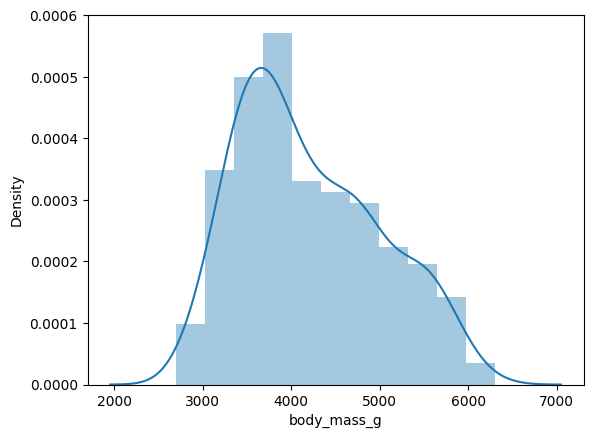

In [86]:
sns.distplot(df['body_mass_g'])

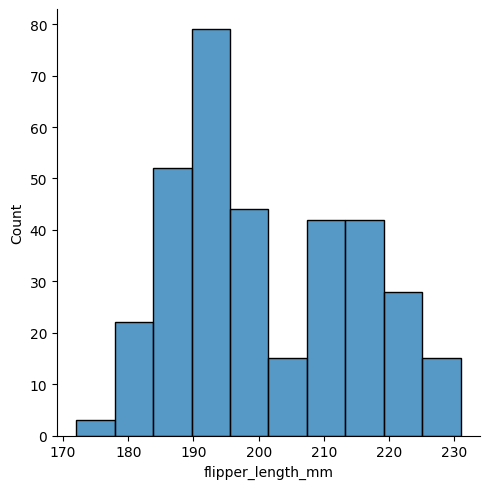

In [87]:
sns.displot(df.flipper_length_mm)

([<matplotlib.patches.Wedge at 0x7ac7c5d6cb20>,
 [Text(0.21796421346719308, 1.1800388136191233, 'Adekie'),
  Text(-0.7918938277833127, -0.7634816078457249, 'Gentoo'),
  Text(0.9596818836032069, -0.6865935349854387, 'Chinstrap')],
 [Text(0.12714579118919594, 0.6883559746111552, '1.1f%'),
  Text(-0.4319420878818069, -0.4164445133703954, '1.1f%'),
  Text(0.5530370176696446, -0.3956640710085579, '1.1f%')])

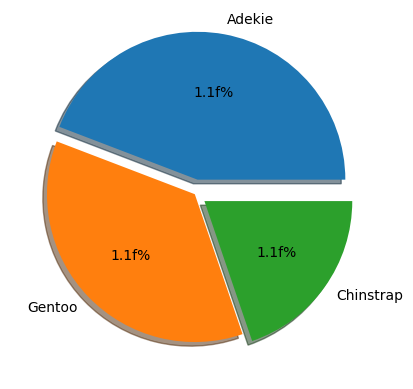

In [88]:
plt.pie(df.species.value_counts(), [0.1, 0, 0.08], labels=['Adekie', 'Gentoo', 'Chinstrap'], autopct="1.1f%%", shadow=True)

bivariate analysis

<BarContainer object of 344 artists>

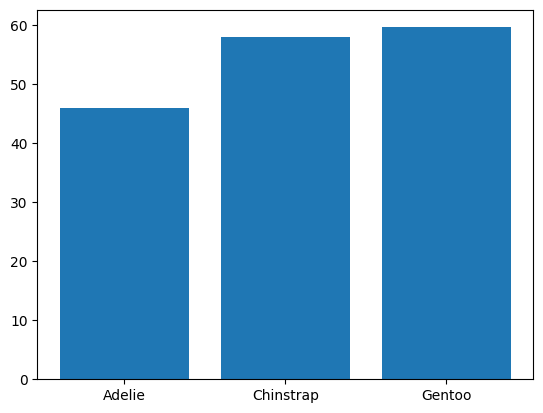

In [89]:
plt.bar(df['species'], df['culmen_length_mm'])

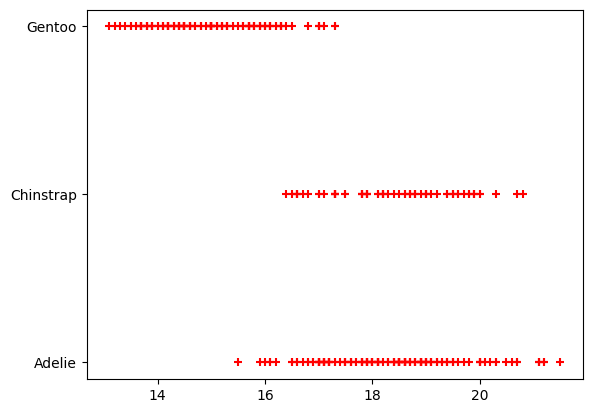

In [90]:
plt.scatter(df.culmen_depth_mm, df.species, marker='+', color='red')

<Axes: xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

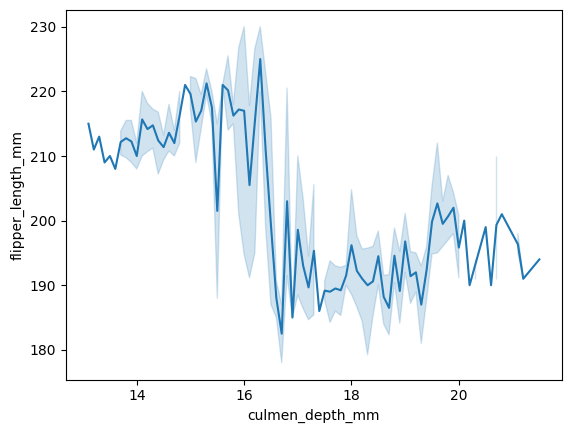

In [91]:
sns.lineplot(x=df['culmen_depth_mm'], y=df['flipper_length_mm'])

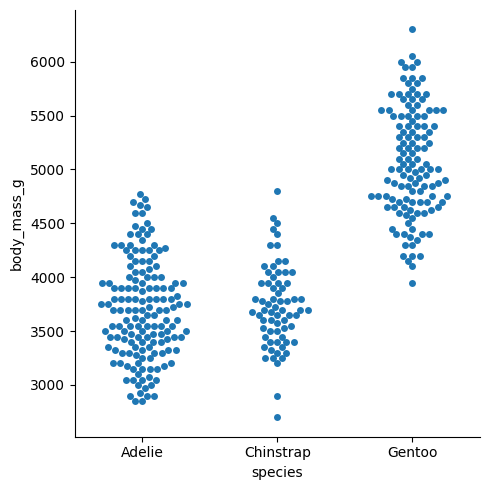

In [92]:
sns.catplot(x='species', y='body_mass_g', data=df, kind="swarm")

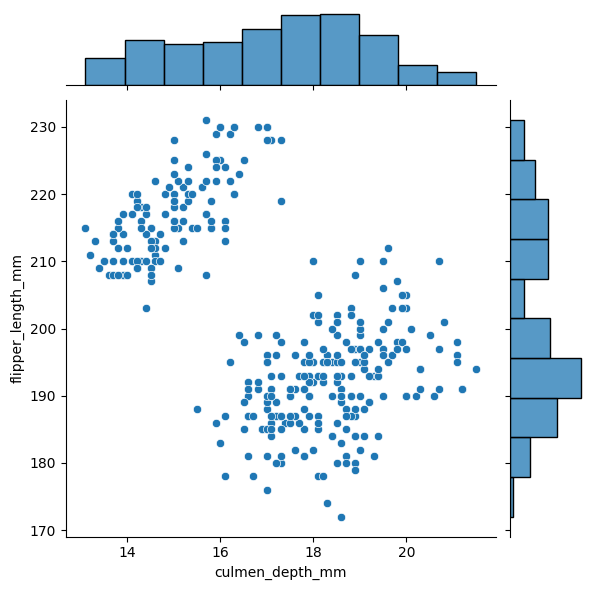

In [93]:
sns.jointplot(x='culmen_depth_mm', y='flipper_length_mm', data=df)

multi variate analysis

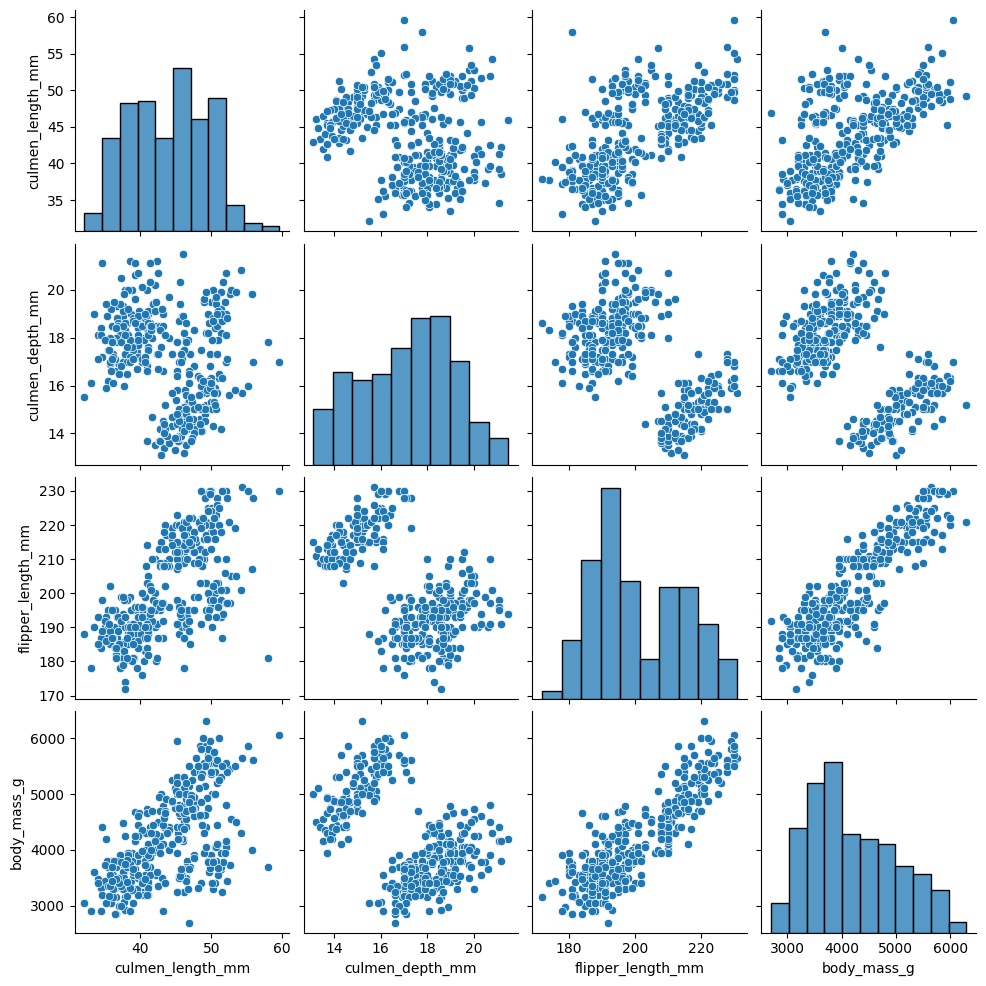

In [94]:
sns.pairplot(df)

<ipython-input-95-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

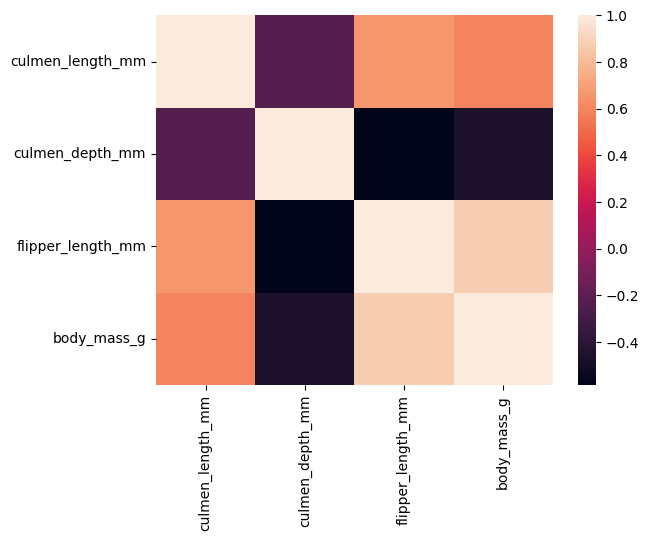

In [95]:
sns.heatmap(df.corr())

##descriptive statiscs

In [96]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [97]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [98]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [99]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##checking null values

In [101]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [102]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

##removing null values

In [103]:
df['sex'] = df['sex'].replace('.', "MALE")

In [104]:
df['sex'] = df['sex'].fillna("MALE")

In [105]:
df.median()

<ipython-input-105-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [106]:
df = df.fillna(df.median())

<ipython-input-106-a187aa03e3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [107]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

##outliers

<Axes: >

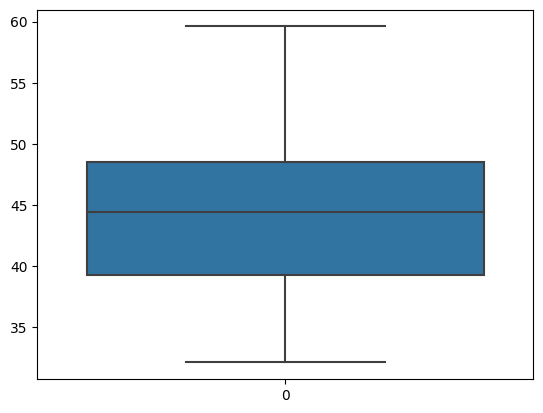

In [108]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

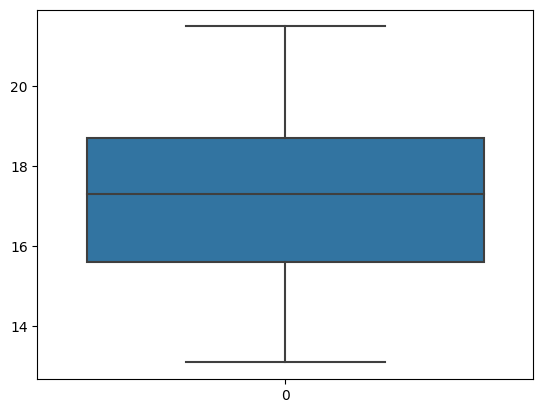

In [109]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

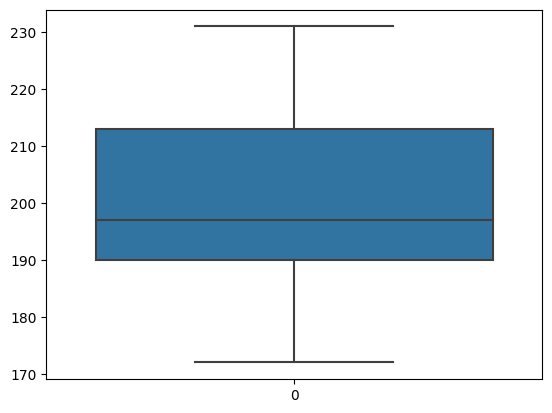

In [110]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

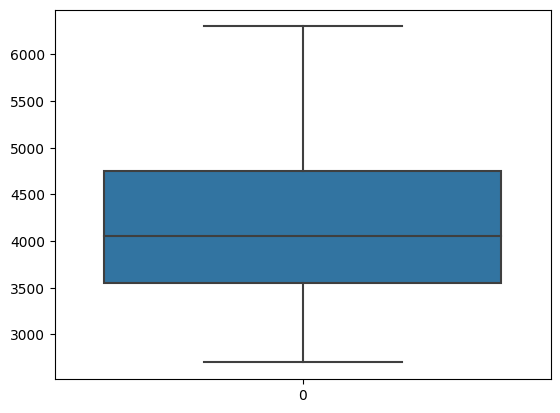

In [111]:
sns.boxplot(df.body_mass_g)

#### correlation

In [112]:
df.corr()

<ipython-input-112-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


##encoding

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [114]:
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df.sex = le.fit_transform(df.sex)

In [115]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


##Correlation of independent variables with target

In [116]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728706,-0.741282,0.850819,0.747547,0.010240
island,-0.635659,1.000000,-0.351189,0.567701,-0.562957,-0.558500,0.002893
culmen_length_mm,0.728706,-0.351189,1.000000,-0.235000,0.655858,0.594925,0.322871
culmen_depth_mm,-0.741282,0.567701,-0.235000,1.000000,-0.583832,-0.471942,0.354791
flipper_length_mm,0.850819,-0.562957,0.655858,-0.583832,1.000000,0.871221,0.241941
body_mass_g,0.747547,-0.558500,0.594925,-0.471942,0.871221,1.000000,0.407107
sex,0.010240,0.002893,0.322871,0.354791,0.241941,0.407107,1.000000


<Axes: >

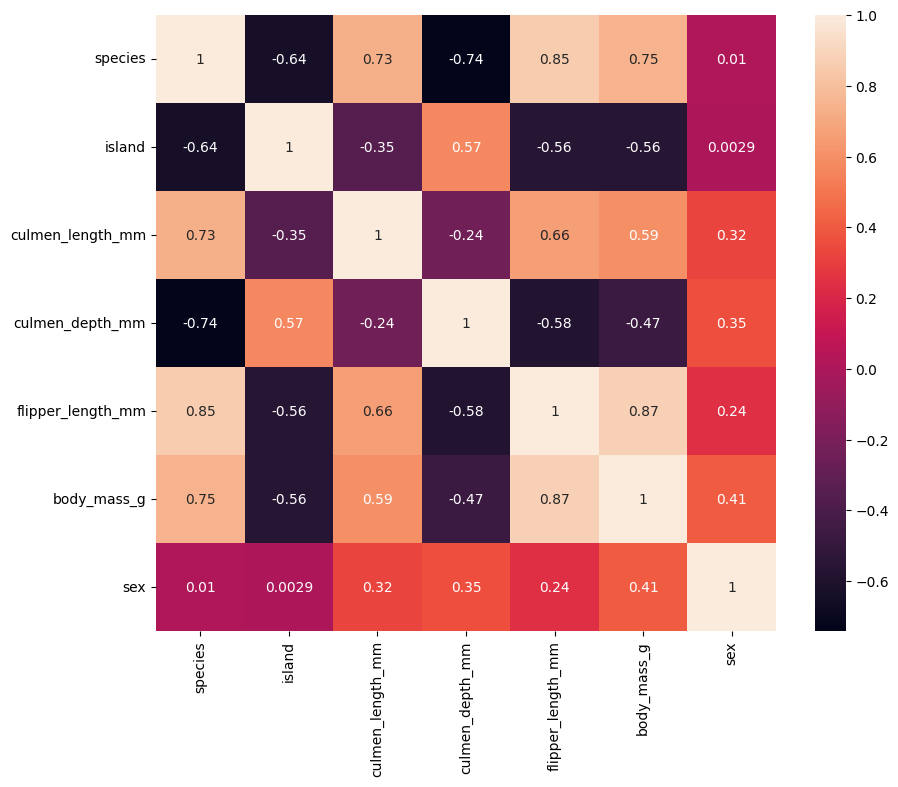

In [117]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot =True)

In [118]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

##spiltting into dependent and independent variables

In [119]:
y = df['species']
X = df.drop('species', axis='columns')

In [120]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [121]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [122]:
y.value_counts()

0    152
2    124
1     68
Name: species, dtype: int64

##scaling the data

In [123]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')

In [124]:
X_sm, y_sm = sm.fit_resample(X, y)

In [125]:
X_sm.describe()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.728972,45.003083,17.427693,200.152682,4115.083051,0.504673
std,0.664526,5.475162,1.905415,12.947532,755.495957,0.500563
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,40.500000,16.075000,190.432671,3550.000000,0.000000
50%,1.000000,45.950000,17.800000,197.000000,3950.000000,1.000000
75%,1.000000,49.725307,18.879050,210.000000,4629.776365,1.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


In [126]:
y_sm.value_counts()

0    152
1    152
2    124
Name: species, dtype: int64

##split into test and train

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1, stratify=y_sm)

train and test data shape

In [128]:
print(X_train.shape)
print(y_train.shape)

(299, 6)
(299,)


In [129]:
print(X_test.shape)
print(y_test.shape)

(129, 6)
(129,)


In [130]:
y_train.value_counts()

0    106
1    106
2     87
Name: species, dtype: int64

In [131]:
y_test.value_counts()

0    46
1    46
2    37
Name: species, dtype: int64